## Introduction

Since it was founded in 1994, Amazon Inc. has quickly expanded outside of its business as an online bookstore and became a corporate behemoth in multiple sectors across the US and globe. Its vast expansion has called for a number of warehouses, logistics subcontractors and new grocery stores that have emerged across the country, and particularly in the Los Angeles and Inland Empire regions. This has, in turn, led to an exponential demand for workers, but unfortunately also a variety of unfair and harsh working conditions. Over the last decade, the media has shown a growing discontent among workers. However, how can we find out more from workers directly about ongoing sentiments for the company? How can we utilize sentiment analyses and topic modeling to do so?

In [1]:
# For this project, we need to import PRAW, an acronym for “Python Reddit API Wrapper”. It is a Python package that allows for simple access to Reddit's API. 

import praw
reddit = praw.Reddit(client_id='oIwScRdl4YJcag', client_secret='N66puMJ_epMz4JS1KCRc59LyK34rBA', user_agent='Scraping2')

Version 7.0.0 of praw is outdated. Version 7.2.0 was released Wednesday February 24, 2021.


In [2]:
# After identifying posts on several subreddits regarding Amazon workers that we wanted to explore, let's scrape them using the PRAW API

Df1 = reddit.submission(url="https://www.reddit.com/r/AmazonDSPDrivers/comments/mf6v2l/were_going_to_walk_out_on_easter_whos_with_me/")
Df2 = reddit.submission(url="https://www.reddit.com/r/AmazonFlexDrivers/comments/m8w010/the_drivers_finally_banded_together_at_my/")
Df3 = reddit.submission(url="https://www.reddit.com/r/FASCAmazon/comments/k5u1zx/say_it_louder_for_the_people_in_the_back/")
Df4 = reddit.submission(url="https://www.reddit.com/r/AmazonFC/comments/l6g47r/oh_the_hierarchy/")
Df5 = reddit.submission(url="https://www.reddit.com/r/AmazonWFShoppers/comments/ku3ywj/what_else_takes_a_lot_of_time/")
Df6 = reddit.submission(url="https://www.reddit.com/r/InlandEmpire/comments/gfc92z/revealed_amazon_told_workers_paid_sick_leave_law/")
Df7 = reddit.submission(url="https://www.reddit.com/r/InlandEmpire/comments/mrrkmc/amazons_warehouse_boom_linked_to_health_hazards/")


In [3]:
# let's look at the "top" commments in these subreddits

for top_level_comment in Df1.comments:
    print(top_level_comment.body)

got support from a USPS brother here.
You got more support from a USPS brother. I drove for amazon for a year and recently left (literally two weeks ago). I support this, preach man
PREACH!!! 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥
Definitely want to do this wish more people at my DSP would be down
preach it man
Support from a FedEx Ground driver. I worked at Amazon too, and I thought it was bad then, it’s so much worse now from what I see. Stand your ground, fuck them to hell.
I already told them not to expect me
I support this
I’ll hand out flyers on the low to fellow drivers to spread the word in my area. Keep up the good work!!!
UPS drivers top rate is at $40, you guys do the same job, time to unionize!
How can consumers support you all better? I’m not a driver btw, just found this from another sub.
Everyone needs to walk out. This is literally word for word out of the communist manifesto. Marx details exactly what happens when the richer get richer and keep the working class down. 

GIVE 

AttributeError: 'MoreComments' object has no attribute 'body'

In [4]:
# great! they came out pretty easy to read
# now let's place all the comments into a list, and then also append the comments from every post into a list called all_comments

all_comments = []

Df1_comments = []
Df1.comments.replace_more(limit=0)
for comment in Df1.comments:
    Df1_comments.append(comment.body)
    all_comments.append(comment.body)
    
Df2_comments = []
Df2.comments.replace_more(limit=0)
for comment in Df2.comments:
    Df2_comments.append(comment.body)
    all_comments.append(comment.body)
    
Df3_comments = []
Df3.comments.replace_more(limit=0)
for comment in Df3.comments:
    Df3_comments.append(comment.body)
    all_comments.append(comment.body)

Df4_comments = []
Df4.comments.replace_more(limit=0)
for comment in Df4.comments:
    Df4_comments.append(comment.body)
    all_comments.append(comment.body)

Df5_comments = []
Df5.comments.replace_more(limit=0)
for comment in Df5.comments:
    Df5_comments.append(comment.body)
    all_comments.append(comment.body)

Df6_comments = []
Df6.comments.replace_more(limit=0)
for comment in Df6.comments:
    Df6_comments.append(comment.body)
    all_comments.append(comment.body)

Df7_comments = []
Df7.comments.replace_more(limit=0)
for comment in Df7.comments:
    Df7_comments.append(comment.body)
    all_comments.append(comment.body)

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
# to prep our comments for sentiment analysis and topic modeling, let's reformat and remove stop words and other words that seem to be common but don't benefit the purposes of this project


swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
 
# add the following words to swords
swords.append('amazon')
swords.append('get')
swords.append('make')
swords.append('way')
swords.append('im')
swords.append('guys')
swords.append('let')
swords.append('way')
swords.append('even')
swords.append('know')
swords.append('want')
swords.append('would')
swords.append('non')
swords.append('ive')


In [7]:
# now we create a function that will remove whitespace, punctuation, capital letters, and all stop words that have 2 or less characters in addition to those we added above

def clean_string(text):
    # remove whitespace
    text = re.sub(r"\s+", " ", text)
    #remove punctuation
    text = re.sub(r"[^A-z\s]", "", text) 
    #remove whitespace again
    text = re.sub(r"\s+", " ", text)
    
    swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
 
    # add the following words to swords
    #swords.append('amazon')
    #swords.append('get')
    #swords.append('make')
    #swords.append('way')
    #swords.append('im')
    #swords.append('guys')
    #swords.append('let')
    #swords.append('way')
    #swords.append('even')
    #swords.append('know')
    #swords.append('want')
    #swords.append('would')
    #swords.append('non')
    #swords.append('ive')
    swords.append('still')
    swords.append('alot')
    swords.append('like')
    swords.append('many')
    swords.append('yall')
    swords.append('got')
    swords.append('[')
    swords.append(']')        

    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords and len(word)>2]

    return cleaned_list_of_words

In [8]:
# great, now we'll create a for loop using our cleaned list of words, and pass it through our original set of comments to clean them up

Df1_words = []
Df1_words = [clean_string(comment) for comment in Df1_comments]

Df2_words = []
Df2_words = [clean_string(comment) for comment in Df2_comments]

Df3_words = []
Df3_words = [clean_string(comment) for comment in Df3_comments]

Df4_words = []
Df4_words = [clean_string(comment) for comment in Df4_comments]

Df5_words = []
Df5_words = [clean_string(comment) for comment in Df5_comments]

Df6_words = []
Df6_words = [clean_string(comment) for comment in Df6_comments]

Df7_words = []
Df7_words = [clean_string(comment) for comment in Df7_comments]

all_words = []
all_words = [clean_string(comment) for comment in all_comments]

In [9]:
# Finally, let's run some topic modeling with our cleaned list of words

import gensim
dictionary = gensim.corpora.Dictionary(Df1_words)
corpus = [dictionary.doc2bow(wl) for wl in Df1_words]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.01, eta=0.5)


import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.033051 -0.014577       1        1  23.047393
0      0.015277 -0.002937       2        1  11.931762
8     -0.021706 -0.019065       3        1   9.535209
7      0.000378  0.018024       4        1   9.300168
5     -0.006237 -0.017511       5        1   9.169962
4      0.003071  0.025138       6        1   9.059888
1     -0.020364  0.004606       7        1   8.703016
3      0.006948 -0.002574       8        1   8.668048
2     -0.010541 -0.002829       9        1   5.785828
6      0.000124  0.011724      10        1   4.798727, topic_info=        Term       Freq      Total Category  logprob  loglift
4     amazon  28.000000  28.000000  Default  30.0000  30.0000
931      yes   4.000000   4.000000  Default  29.0000  29.0000
172    union   8.000000   8.000000  Default  28.0000  28.0000
1    support  14.000000  14.000000  Default  27.0000  27.0000
21    driver  10.000000  10.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
80   package   0.327004   3.963604  Topic10  -6.1587   0.5419
216      ive   0.346285   5.748690  Topic10  -6.1014   0.2274
23      fuck   0.362100   8.656191  Topic10  -6.0568  -0.1373
21    driver   0.353778  10.667631  Topic10  -6.0800  -0.3695
181     even   0.325415   5.646049  Topic10  -6.1636   0.1832

[607 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
790       7  0.406116  ability
501       1  0.409199   absurd
501       2  0.409199   absurd
343       3  0.440687  actions
3         2  0.331588      ago
...     ...       ...      ...
19        9  0.141534    would
1249      1  0.447016    write
409       3  0.360545     yeah
931       1  0.207802      yes
931       4  0.623407      yes

[572 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 9, 8, 6, 5, 2, 4, 3, 7])

#### 

Our results are really interesting. Upon looking at topic 1, it's a little hard to understand what the relationship between the words are. However, when we 
decrease the lambda to about 0.5, we are then able to re-rank the words to get a stronger relationship between words more frequently found within the topic. Now, we see that time, unionize, rate, conditions, and crazy seem to suggest that there are feelings of unreasonable working conditions for workers, especially among drivers the vast majority of topics seem to closely relate to topic 1, so let's look at topic 2. Even with a Lambda=1, this seems to suggest feelings of action that workers want to take as a result of perhaps the working conditions. We can see this through words such as hope, support, work, fight, together, and deserve topic 3 similarly suggests actions that workers may want to unionize, especially as we see that the words hope, unionize, money, solidarity, and workers stand out at a lambda of about 0.5



In [10]:
# okay now let's move to doing a sentiment analysis

from textblob import TextBlob
def get_sentiment(list_of_words):
    joined_list = ' '.join(list_of_words)
    polarity = TextBlob(joined_list).sentiment.polarity
    return polarity

In [11]:
# we'll create a for loop to get the sentiment of each individual comment as well as create a new variable combine all of them.

all_scores = [] 
all_scores = [get_sentiment(comment) for comment in all_words]

Df1_scores = []
Df1_scores = [get_sentiment(comment) for comment in Df1_words]

Df2_scores = []
Df2_scores = [get_sentiment(comment) for comment in Df2_words]

Df3_scores = []
Df3_scores = [get_sentiment(comment) for comment in Df3_words]

Df4_scores = []
Df4_scores = [get_sentiment(comment) for comment in Df4_words]

Df5_scores = []
Df5_scores = [get_sentiment(comment) for comment in Df5_words]

Df6_scores = []
Df6_scores = [get_sentiment(comment) for comment in Df6_words]

Df7_scores = []
Df7_scores = [get_sentiment(comment) for comment in Df7_words]

In [12]:
# let's see what our new variable looks like

all_scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.06666666666666665,
 0.5,
 0.5,
 0.25,
 -0.25,
 0.1,
 0.0,
 -0.8,
 0.0,
 -0.12916666666666668,
 0.8,
 -0.2,
 0.0,
 0.03125,
 0.0,
 0.4444444444444444,
 0.0,
 0.07777777777777778,
 -0.05624999999999997,
 0.2,
 0.024999999999999994,
 0.5,
 -0.8,
 0.4333333333333333,
 0.0,
 -0.04116161616161617,
 0.0,
 -0.11666666666666668,
 0.1875,
 0.08333333333333333,
 0.0,
 0.0,
 -0.5,
 0.034242424242424234,
 -0.4,
 0.09999999999999998,
 -0.10499999999999998,
 -0.6,
 1.0,
 0.0,
 -0.9,
 0.7,
 -0.4,
 -0.03421717171717171,
 0.7,
 0.7,
 0.4333333333333333,
 -0.15000000000000002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 -0.3499999999999999,
 0.7,
 0.1,
 0.35,
 -0.1525793650793651,
 0.02083333333333333,
 -0.2916666666666667,
 0.0,
 0.35,
 0.3,
 -0.265625,
 -0.25000000000000006,
 0.0,
 0.1376190476190476,
 0.0,
 0.19999999999999998,
 0.0,
 0.2,
 0.0,
 -0.03214285714285714,
 0.0,
 -0.5,
 0.08333333333333336,
 -0.4,
 0.0,
 0.0,
 -0.009166666666666684,
 0.0,
 0.0,


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# change the subreddit/variable names to something more meaningful and to match the subreddit they came from
a = (np.mean(Df1_scores))
b = (np.mean(Df2_scores))
c = (np.mean(Df3_scores))
d = (np.mean(Df4_scores))
e = (np.mean(Df5_scores))
f = (np.mean(Df6_scores))
g = (np.mean(Df7_scores))
h = (np.mean(all_scores))

means = {'all': h, 'DSP': a, 'Flex': b, 'FASC': c, 'FC': d, 'WF': e, 'IE': f, 'IE2': g}

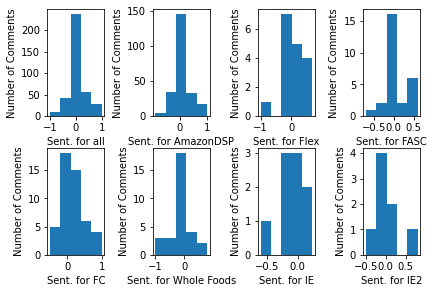

In [23]:
# What are the mean sentiment scores of comments under each individual subreddit post, in addition to our combined variable?
# let's see and then graph all of them side by side for comparison

data = [all_scores, Df1_scores, Df2_scores, Df3_scores, Df4_scores, Df5_scores, Df6_scores, Df7_scores]
lisp = ['all', 'AmazonDSP', 'Flex', 'FASC', 'FC', 'Whole Foods', 'IE', 'IE2']
f, a = plt.subplots(2,4)
plt.tight_layout()
a = a.ravel()
for idx, ax in enumerate(a):
    ax.hist(data[idx], bins = 5)
    ax.set_xlabel('Sent. for {}'.format(lisp[idx]))
    ax.set_ylabel('Number of Comments')

        
plt.show()

#In the end, Isabel couldn't figure out how to put titles on these so you have to have a legend like the one below to interpret
#Plot 1: all comments in all posts
#Plot 2:'DSP' = DSP drivers
#Plot 3:'Flex' = flex drivers
#Plot 4:'FASC' = fulfillment and sortation centers
#Plot 5:'FC' = fulfillment centers
#Plot 6:'WF' = whole foods shoppers
#Plot 7:'IE'
#Plot 8:'IE2'

In [24]:
# it's a little challenging to see the values with our charts above. let's try putting these in a table instead

df = pd.DataFrame(list(means.items()),columns = ['SubReddit','sentiment mean']) 

In [25]:
# plot a table to see actual sentiment mean values

df.set_index('SubReddit')

,sentiment mean
SubReddit,
all,0.063937
DSP,0.066962
Flex,0.137717
FASC,0.065282
FC,0.120107
WF,-0.051704
IE,-0.067113
IE2,0.057813


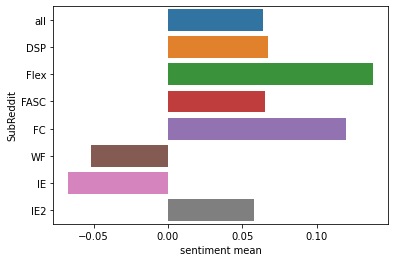

In [26]:
# now we can see that the Whole Foods and Inland Empire subreddits seems to have the most negative sentiments, and then Flex Drivers' subreddit has the most positive
# however, it's important to note that all subreddits are overall not very positive. our combined varialbe shows a more neutral sentiment at 0.06.

# see what a bar plot might look like instead

ax = sns.barplot(x="sentiment mean", y="SubReddit", data=df)

In [27]:
# this seems to make more visual sense compared to the barplots above

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [29]:
# it might be interesting to clean the words further to see if we can get different topic modeling results. let's use the lemmatization to remove certain words and their variations 

def lem_words(text):
    # remove whitespace
    text = re.sub(r"\s+", " ", text)
    #remove punctuation
    text = re.sub(r"[^A-z\s]", "", text) 
    #remove whitespace again
    text = re.sub(r"\s+", " ", text)
    
    swords1 = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
    
    # add the following words to swords
    swords1.append('amazon')
    swords1.append('get')
    swords1.append('make')
    swords1.append('way')
    swords1.append('im')
    swords1.append('guys')
    swords1.append('let')
    swords1.append('way')
    swords1.append('even')
    swords1.append('know')
    swords1.append('want')
    swords1.append('would')
    swords1.append('non')
    swords1.append('ive')
    
    cleaned_list_of_worms = [word for word in word_tokenize(text.lower()) if word not in swords1 and len(word)>2]
    lwords = [ps.stem(word) for word in cleaned_list_of_worms]
    
    return lwords

In [30]:
# re-run code above, using a for loop using our lemmatized list of words, and passing it through our original set of comments to clean them up


Df1_lem = []
Df1_lem = [lem_words(comment) for comment in Df1_comments]

Df2_lem = []
Df2_lem = [lem_words(comment) for comment in Df2_comments]

Df3_lem = []
Df3_lem = [lem_words(comment) for comment in Df3_comments]

Df4_lem = []
Df4_lem = [lem_words(comment) for comment in Df4_comments]

Df5_lem = []
Df5_lem = [lem_words(comment) for comment in Df5_comments]

Df6_lem = []
Df6_lem = [lem_words(comment) for comment in Df6_comments]

Df7_lem = []
Df7_lem = [lem_words(comment) for comment in Df7_comments]

all_lem = []
all_lem = [lem_words(comment) for comment in all_comments]

In [31]:
# get sentiment scores for our new set of words

all_lem_scores = [] 
all_scores = [get_sentiment(comment) for comment in all_lem]

Df1_lem_scores = []
Df1_lem_scores = [get_sentiment(comment) for comment in Df1_lem]

Df2_lem_scores = []
Df2_lem_scores = [get_sentiment(comment) for comment in Df2_lem]

Df3_lem_scores = []
Df3_lem_scores = [get_sentiment(comment) for comment in Df3_lem]

Df4_lem_scores = []
Df4_lem_scores = [get_sentiment(comment) for comment in Df4_lem]

Df5_lem_scores = []
Df5_lem_scores = [get_sentiment(comment) for comment in Df5_lem]

Df6_lem_scores = []
Df6_lem_scores = [get_sentiment(comment) for comment in Df6_lem]

Df7_lem_scores = []
Df7_lem_scores = [get_sentiment(comment) for comment in Df7_lem]

In [ ]:
# run topic modeling again to see what we get

import gensim
import pyLDAvis
import pyLDAvis.gensim_models

# your code here
dictionary = gensim.corpora.Dictionary(all_lem)
corpus = [dictionary.doc2bow(word) for word in all_lem]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.9, eta=0.9)
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

#### 

Interestingly, at first glance, we can see that all the topics are much more spread out. This means that they are less related compared to the previous time we plotted topics looking at topic 1 again, when adjusted to lambda = 0.5, there seems to be a more word frequencies that pop up, including a lot of words that perhaps aren't too helpful. In general though, we do seem to draw the same theme of worker discontent. Another interesting observation is that lthough we see that "warehouse" and "driver" come up here, we know from our sentiment analysis that the Whole Foods Subreddit had the most negative sentiment analysis. Therefore, it's helpful to utilize these methods together to draw conclusions. We can say similar things about other topics. Words like "pay", "support", "time", "union", and "job" stand out, indicating worker organizing and/or desires for changes in working conditions

In [ ]:
#print the topics to see if there's anything interesting about the order or the 
print(model.print_topics())
doc_lda = model[corpus]

#### Topics

1. (0, '0.005*"work" + 0.003*"like" + 0.003*"job" + 0.003*"union" + 0.003*"peopl" + 0.003*"driver" + 0.003*"support" + 0.002*"time" + 0.002*"need" + 0.002*"pay"'), 
2. (1, '0.004*"work" + 0.003*"driver" + 0.003*"union" + 0.003*"peopl" + 0.003*"support" + 0.003*"like" + 0.002*"good" + 0.002*"job" + 0.002*"fuck" + 0.002*"need"'), 
3. (2, '0.004*"work" + 0.004*"driver" + 0.004*"union" + 0.003*"peopl" + 0.003*"job" + 0.003*"support" + 0.003*"like" + 0.003*"worker" + 0.002*"time" + 0.002*"good"'), 
4. (3, '0.004*"union" + 0.004*"work" + 0.003*"driver" + 0.003*"job" + 0.003*"peopl" + 0.003*"like" + 0.003*"fuck" + 0.002*"one" + 0.002*"good" + 0.002*"need"'), 
5. (4, '0.004*"work" + 0.004*"driver" + 0.003*"job" + 0.003*"union" + 0.003*"peopl" + 0.003*"like" + 0.003*"good" + 0.003*"support" + 0.003*"fuck" + 0.003*"time"'), 
6. (5, '0.004*"work" + 0.003*"job" + 0.003*"union" + 0.003*"driver" + 0.003*"like" + 0.003*"peopl" + 0.003*"good" + 0.003*"support" + 0.002*"need" + 0.002*"worker"'), 
7. (6, '0.004*"work" + 0.003*"job" + 0.003*"driver" + 0.003*"union" + 0.003*"like" + 0.003*"peopl" + 0.002*"support" + 0.002*"time" + 0.002*"good" + 0.002*"fuck"'), 
8. (7, '0.004*"work" + 0.003*"driver" + 0.003*"like" + 0.003*"union" + 0.003*"job" + 0.003*"support" + 0.003*"good" + 0.002*"peopl" + 0.002*"time" + 0.002*"day"'), 
9. (8, '0.004*"work" + 0.003*"driver" + 0.003*"like" + 0.003*"union" + 0.003*"job" + 0.003*"peopl" + 0.003*"support" + 0.003*"good" + 0.002*"need" + 0.002*"time"'), 
10. (9, '0.004*"work" + 0.004*"union" + 0.003*"driver" + 0.003*"job" + 0.003*"peopl" + 0.003*"like" + 0.003*"fuck" + 0.002*"support" + 0.002*"good" + 0.002*"time"')

As expected, the primary topics are related to working, organizing for better conditions, and the job type. Differences are slight but it's overall interesting to see how all 7 posts, across 6 different subreddits end up having the same kind of conversation. 

Note: we kept curse words because they show us intensity of opinions/emotions/ideas. 

#### Contributions:
Both team members contributed to analyzing subreddits. Isabel specifically ran code to connect to subreddit’s API, combine subreddits into one notebook, and created charts and other visuals. Since the advice given for this assignment was to run code with a sample of our data and then scale up, Gerrlyn applied our initial code to the other six subreddits to ensure it worked for all of them. She added edits to our list of stop words and provided markdown codes to the notebook as well.


#### How we worked together as a team: 
The timeline for our work would have taken much longer if we did not choose to combine all subreddits threads into one notebook, since we would have had to run the code for separate ones, provide some analysis, and compare outcomes across notebooks. Were that to happen, we would have split notebooks and ran the same codes and analysis for each. However, since we chose to streamline everything, it ended up being best to send an updated notebook back and forth or share added codes via Slack. We also held regular check in’s each week about our project. Because the research topic for this project was based off of our capstone project which we are also working closely on together, this made the planning and analysis process run smoother in many ways. We’re excited to have our analyses for this class contribute to that project as well.